## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap XMAS scan (paranoid)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_xmas_scan_paranoid'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    329477.085569
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    329477.085569
1    329478.356176
2    329473.069118
3    329477.252640
4    329480.442616
5    329478.284546
6    329482.124418
7    329478.678612
8    329479.181154
9    329478.687179
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    329478.316203
dtype: float64

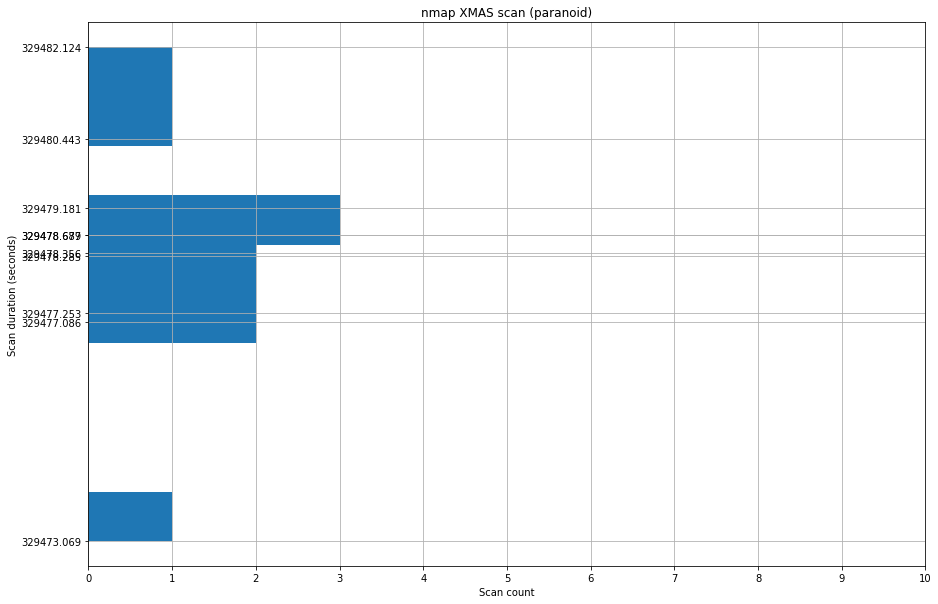

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,329478.316203
std,2.362234
min,329473.069118
25%,329477.510616
50%,329478.517394
75%,329479.057660
max,329482.124418


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 0.06671152218246007



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 49338 110
2 49338 139
3 49338 3306
4 49338 25
5 49338 1720
6 49338 5900
7 49338 256
8 49338 80
9 49338 143
10 49338 445
11 49343 110
12 49338 113
13 49338 587
14 49338 23
15 49338 443
16 49338 135
17 49338 8888
18 49338 111
19 49338 554
20 49338 22
21 49338 993
22 49345 110
23 49338 3389
24 49338 1025
25 49338 21
26 49338 8080
27 49338 1723
28 49338 995
29 49338 199
30 49338 53
31 49338 5859
32 49338 9
33 49347 110
34 49338 1501
35 49338 3283
36 49338 1073
37 49338 5850
38 49338 1090
39 49338 5815
40 49338 2005
41 49338 7004
42 49338 1233
43 49338 7800
44 49349 110
45 49338 18101
46 49338 3371
47 49338 765
48 49338 32
49 49338 6779
50 49338 4848
51 49338 1719
52 49338 2103
53 49338 6346
54 49338 4998
55 49351 110
56 49338 900
57 49338 1163
58 49338 2492
59 49338 2717
60 49338 500
61 49338 8222
62 49338 12000
63 49338 8086
64 49338 8181
65 49338 8193
66 49353 110
67 49338 7106
68 49338 2604
69 49338 222
70 49338 726
71 49338 27352
72 49338 1121
73 49338 1011
74 49338 33899
75 49338 10

624 49338 1098
625 49338 1108
626 49338 6689
627 49455 110
628 49338 1044
629 49338 10010
630 49338 1047
631 49338 5009
632 49338 5226
633 49338 3221
634 49338 1055
635 49338 50000
636 49338 1048
637 49338 1007
638 49457 110
639 49338 8654
640 49338 1192
641 49338 20000
642 49338 2040
643 49338 425
644 49338 7100
645 49338 8007
646 49338 1311
647 49338 3920
648 49338 1042
649 49459 110
650 49338 4005
651 49338 1071
652 49338 5102
653 49338 1641
654 49338 4126
655 49338 61900
656 49338 4567
657 49338 2301
658 49338 82
659 49338 2967
660 49461 110
661 49338 705
662 49338 10003
663 49338 20
664 49338 1658
665 49338 6839
666 49338 2382
667 49338 9900
668 49338 88
669 49338 3322
670 49338 1126
671 49463 110
672 49338 625
673 49338 1041
674 49338 30
675 49338 9666
676 49338 8082
677 49338 4006
678 49338 6101
679 49338 1075
680 49338 8042
681 49338 34573
682 49465 110
683 49338 5080
684 49338 2710
685 49338 1840
686 49338 6156
687 49338 8100
688 49338 8011
689 49338 5051
690 49338 1151
691 49

400 33058 9102
401 33058 3007
402 33058 3005
403 33058 683
404 33058 5544
405 33058 64680
406 33058 4125
407 33135 1025
408 33058 1594
409 33058 9500
410 33058 211
411 33058 5510
412 33058 765
413 33058 6123
414 33058 2047
415 33058 631
416 33058 32784
417 33058 6007
418 33137 1025
419 33058 9009
420 33058 9081
421 33058 1163
422 33058 843
423 33058 41511
424 33058 3168
425 33058 9943
426 33058 6112
427 33058 1216
428 33058 6567
429 33139 1025
430 33058 5405
431 33058 1106
432 33058 3323
433 33058 1533
434 33058 5120
435 33058 1070
436 33058 3995
437 33058 146
438 33058 65000
439 33058 5901
440 33141 1025
441 33058 901
442 33058 1201
443 33058 714
444 33058 2522
445 33058 8022
446 33058 49999
447 33058 513
448 33058 16016
449 33058 24
450 33058 2126
451 33143 1025
452 33058 6100
453 33058 16018
454 33058 1048
455 33058 1556
456 33058 3659
457 33058 4998
458 33058 5222
459 33058 2001
460 33058 1121
461 33058 8600
462 33145 1025
463 33058 808
464 33058 9100
465 33058 5850
466 33058 32768

1023 33247 1025
1024 33058 50000
1025 33058 50800
1026 33058 16001
1027 33058 1117
1028 33058 5915
1029 33058 32779
1030 33058 9110
1031 33058 79
1032 33058 416
1033 33058 1971
1034 33249 1025
1035 33058 1719
1036 33058 3001
1037 33058 8500
1038 33058 593
1039 33058 10180
1040 33058 3546
1041 33058 548
1042 33058 5802
1043 33058 5902
1044 33058 88
1045 33251 1025
1046 33058 60443
1047 33058 8090
1048 33058 10003
1049 33058 5960
1050 33058 687
1051 33058 1033
1052 33058 2381
1053 33058 9040
1054 33058 1863
1055 33058 14441
1056 33253 1025
1057 33058 35500
1058 33058 1043
1059 33058 3476
1060 33058 42
1061 33058 17
1062 33058 2045
1063 33058 38292
1064 33058 1236
1065 33058 5679
1066 33058 18040
1067 33255 1025
1068 33058 2103
1069 33058 1352
1070 33058 617
1071 33058 3878
1072 33058 2910
1073 33058 10004
1074 33058 6510
1075 33058 52822
1076 33058 5862
1077 33058 3800
1078 33257 1025
1079 33058 8222
1080 33058 7019
1081 33058 5633
1082 33058 1000
1083 33058 5357
1084 33058 34571
1085 33

591 33948 12174
592 33948 2191
593 33948 691
594 34059 143
595 33948 32769
596 33948 2030
597 33948 800
598 33948 3
599 33948 9595
600 33948 1088
601 33948 3000
602 33948 1688
603 33948 2811
604 33948 2161
605 34061 143
606 33948 17
607 33948 1078
608 33948 9998
609 33948 2038
610 33948 2718
611 33948 1248
612 33948 32770
613 33948 10001
614 33948 32780
615 33948 5500
616 34063 143
617 33948 5904
618 33948 1185
619 33948 1594
620 33948 1042
621 33948 222
622 33948 2105
623 33948 6112
624 33948 2119
625 33948 406
626 33948 9009
627 34065 143
628 33948 1322
629 33948 2910
630 33948 990
631 33948 1074
632 33948 1801
633 33948 5631
634 33948 2522
635 33948 20
636 33948 1130
637 33948 5959
638 34067 143
639 33948 1666
640 33948 3261
641 33948 1503
642 33948 524
643 33948 3476
644 33948 61532
645 33948 51493
646 33948 5544
647 33948 5001
648 33948 4242
649 34069 143
650 33948 49
651 33948 2049
652 33948 2800
653 33948 1863
654 33948 7000
655 33948 2602
656 33948 8090
657 33948 49176
658 3394

158 39757 1234
159 39757 5815
160 39757 1310
161 39757 17877
162 39757 1259
163 39757 5801
164 39757 777
165 39790 8888
166 39757 8200
167 39757 63331
168 39757 1864
169 39757 7911
170 39757 1083
171 39757 8082
172 39757 6004
173 39757 4000
174 39757 27355
175 39757 3017
176 39792 8888
177 39757 667
178 39757 2068
179 39757 9001
180 39757 6666
181 39757 1055
182 39757 3945
183 39757 1216
184 39757 1095
185 39757 9090
186 39757 3301
187 39794 8888
188 39757 8100
189 39757 6502
190 39757 1972
191 39757 9500
192 39757 7435
193 39757 8010
194 39757 9000
195 39757 1011
196 39757 10621
197 39757 1057
198 39796 8888
199 39757 1272
200 39757 427
201 39757 11111
202 39757 48080
203 39757 1700
204 39757 1149
205 39757 2048
206 39757 6567
207 39757 9575
208 39757 15003
209 39798 8888
210 39757 8011
211 39757 3889
212 39757 1875
213 39757 9876
214 39757 5802
215 39757 9595
216 39757 32776
217 39757 1148
218 39757 7001
219 39757 24800
220 39800 8888
221 39757 1137
222 39757 32777
223 39757 1187
224

824 39757 1034
825 39910 8888
826 39757 7921
827 39757 6007
828 39757 3323
829 39757 64680
830 39757 20031
831 39757 10002
832 39757 49157
833 39757 3000
834 39757 8088
835 39757 7002
836 39912 8888
837 39757 10617
838 39757 64623
839 39757 44443
840 39757 808
841 39757 27715
842 39757 3351
843 39757 1124
844 39757 10010
845 39757 3013
846 39757 5550
847 39914 8888
848 39757 32779
849 39757 912
850 39757 23502
851 39757 3031
852 39757 50300
853 39757 32768
854 39757 9593
855 39757 6001
856 39757 49176
857 39757 49160
858 39916 8888
859 39757 1098
860 39757 1106
861 39757 21571
862 39757 1061
863 39757 7200
864 39757 497
865 39757 65389
866 39757 5730
867 39757 9010
868 39757 7000
869 39918 8888
870 39757 10024
871 39757 1271
872 39757 3372
873 39757 5902
874 39757 6003
875 39757 340
876 39757 2065
877 39757 2500
878 39757 1334
879 39757 1117
880 39920 8888
881 39757 1091
882 39757 1174
883 39757 3128
884 39757 27000
885 39757 1100
886 39757 8081
887 39757 264
888 39757 6389
889 39757 1

392 41829 28201
393 41829 1111
394 41829 32776
395 41829 2043
396 41904 3389
397 41829 84
398 41829 1218
399 41829 1048
400 41829 10009
401 41829 6106
402 41829 49159
403 41829 32771
404 41829 6025
405 41829 65000
406 41829 1300
407 41906 3389
408 41829 6667
409 41829 12265
410 41829 65389
411 41829 1175
412 41829 7019
413 41829 5631
414 41829 61900
415 41829 2968
416 41829 4242
417 41829 8093
418 41908 3389
419 41829 49175
420 41829 7627
421 41829 7999
422 41829 5678
423 41829 880
424 41829 6009
425 41829 3851
426 41829 912
427 41829 1455
428 41829 5221
429 41910 3389
430 41829 3689
431 41829 1688
432 41829 32778
433 41829 2393
434 41829 5560
435 41829 1085
436 41829 1073
437 41829 4449
438 41829 60020
439 41829 6699
440 41912 3389
441 41829 6346
442 41829 1106
443 41829 9666
444 41829 6123
445 41829 9101
446 41829 6502
447 41829 3659
448 41829 18101
449 41829 1839
450 41829 7103
451 41914 3389
452 41829 5432
453 41829 20
454 41829 3889
455 41829 2809
456 41829 16018
457 41829 555
458

1058 41829 543
1059 41829 843
1060 41829 1076
1061 41829 2301
1062 41829 5915
1063 41829 58080
1064 41829 458
1065 41829 9917
1066 41829 465
1067 42026 3389
1068 41829 1971
1069 41829 100
1070 41829 6901
1071 41829 6547
1072 41829 2557
1073 41829 7007
1074 41829 2047
1075 41829 52848
1076 41829 6792
1077 41829 3703
1078 42028 3389
1079 41829 617
1080 41829 1041
1081 41829 9090
1082 41829 2260
1083 41829 1417
1084 41829 1100
1085 41829 1029
1086 41829 1721
1087 41829 9929
1088 41829 646
1089 42030 3389
1090 41829 4002
1091 41829 8008
1092 41829 1010
1093 41829 3551
1094 41829 1007
1095 41829 1947
1096 41829 6646
1097 41829 1122
1098 41829 32769
1099 41829 1900
1 35469 1720
2 35469 22
3 35469 1025
4 35469 8080
5 35469 25
6 35469 139
7 35469 256
8 35469 445
9 35469 111
10 35469 8888
11 35474 1720
12 35469 3306
13 35469 587
14 35469 199
15 35469 21
16 35469 113
17 35469 3389
18 35469 80
19 35469 443
20 35469 5900
21 35469 995
22 35476 1720
23 35469 110
24 35469 1723
25 35469 143
26 35469 2

625 35469 35500
626 35469 3301
627 35586 1720
628 35469 15004
629 35469 800
630 35469 2500
631 35469 1583
632 35469 5825
633 35469 1183
634 35469 6000
635 35469 3260
636 35469 5560
637 35469 1063
638 35588 1720
639 35469 1053
640 35469 1117
641 35469 1076
642 35469 888
643 35469 1026
644 35469 2100
645 35469 2638
646 35469 2809
647 35469 5811
648 35469 9080
649 35590 1720
650 35469 9502
651 35469 722
652 35469 49176
653 35469 6006
654 35469 6565
655 35469 5679
656 35469 9207
657 35469 17
658 35469 7800
659 35469 3031
660 35592 1720
661 35469 5998
662 35469 255
663 35469 6003
664 35469 6901
665 35469 1056
666 35469 33354
667 35469 3071
668 35469 2106
669 35469 5962
670 35469 3998
671 35594 1720
672 35469 9000
673 35469 1011
674 35469 50300
675 35469 9091
676 35469 3333
677 35469 7004
678 35469 9102
679 35469 3268
680 35469 783
681 35469 1086
682 35596 1720
683 35469 2121
684 35469 8333
685 35469 8600
686 35469 4445
687 35469 1434
688 35469 1132
689 35469 6389
690 35469 1287
691 35469 87

193 63010 1137
194 63010 1070
195 63010 49163
196 63010 3370
197 63010 2021
198 63049 3306
199 63010 6123
200 63010 1032
201 63010 5214
202 63010 4242
203 63010 7007
204 63010 1805
205 63010 425
206 63010 211
207 63010 5280
208 63010 32772
209 63051 3306
210 63010 8099
211 63010 35500
212 63010 10778
213 63010 1112
214 63010 1974
215 63010 1039
216 63010 2607
217 63010 1044
218 63010 4006
219 63010 8009
220 63053 3306
221 63010 8011
222 63010 9535
223 63010 593
224 63010 2967
225 63010 4443
226 63010 1031
227 63010 465
228 63010 5051
229 63010 1271
230 63010 1036
231 63055 3306
232 63010 10566
233 63010 2007
234 63010 8800
235 63010 8994
236 63010 2399
237 63010 30
238 63010 1108
239 63010 254
240 63010 10002
241 63010 10024
242 63057 3306
243 63010 5904
244 63010 5952
245 63010 3889
246 63010 9666
247 63010 5902
248 63010 8100
249 63010 1272
250 63010 1066
251 63010 2022
252 63010 1034
253 63059 3306
254 63010 5850
255 63010 20031
256 63010 28201
257 63010 8192
258 63010 5911
259 6301

859 63010 7000
860 63010 2135
861 63010 23502
862 63010 125
863 63010 3013
864 63010 16113
865 63010 8045
866 63010 1148
867 63010 2717
868 63010 666
869 63171 3306
870 63010 27355
871 63010 2161
872 63010 5962
873 63010 2492
874 63010 3493
875 63010 13782
876 63010 801
877 63010 898
878 63010 1053
879 63010 2394
880 63173 3306
881 63010 9502
882 63010 5901
883 63010 12174
884 63010 33899
885 63010 726
886 63010 5963
887 63010 12345
888 63010 1455
889 63010 5925
890 63010 6699
891 63175 3306
892 63010 6007
893 63010 17988
894 63010 3030
895 63010 631
896 63010 5800
897 63010 5825
898 63010 1186
899 63010 1058
900 63010 20
901 63010 9418
902 63177 3306
903 63010 7001
904 63010 3827
905 63010 10628
906 63010 625
907 63010 1461
908 63010 5033
909 63010 34572
910 63010 8086
911 63010 3659
912 63010 1082
913 63179 3306
914 63010 32770
915 63010 8083
916 63010 1009
917 63010 2381
918 63010 42510
919 63010 8333
920 63010 1114
921 63010 5087
922 63010 406
923 63010 9900
924 63181 3306
925 6301

426 51411 9968
427 51411 211
428 51411 3995
429 51492 53
430 51411 1287
431 51411 1783
432 51411 7019
433 51411 1043
434 51411 5925
435 51411 2170
436 51411 7001
437 51411 5061
438 51411 7938
439 51411 1021
440 51494 53
441 51411 1092
442 51411 11111
443 51411 9002
444 51411 2126
445 51411 2190
446 51411 6881
447 51411 1183
448 51411 3878
449 51411 2200
450 51411 898
451 51496 53
452 51411 30951
453 51411 1111
454 51411 777
455 51411 32779
456 51411 3390
457 51411 617
458 51411 765
459 51411 2725
460 51411 1073
461 51411 1052
462 51498 53
463 51411 2048
464 51411 3476
465 51411 5431
466 51411 85
467 51411 1311
468 51411 1352
469 51411 144
470 51411 9876
471 51411 8200
472 51411 3851
473 51500 53
474 51411 49999
475 51411 16001
476 51411 800
477 51411 4003
478 51411 4111
479 51411 636
480 51411 10626
481 51411 3367
482 51411 1084
483 51411 5718
484 51502 53
485 51411 7921
486 51411 3828
487 51411 1863
488 51411 31337
489 51411 6839
490 51411 2401
491 51411 65129
492 51411 9594
493 51411

1093 51411 8002
1094 51411 4279
1095 51411 1074
1096 51411 4343
1097 51411 8045
1098 51411 1328
1099 51411 6389
1 36147 3306
2 36147 993
3 36147 80
4 36147 199
5 36147 1720
6 36147 135
7 36147 995
8 36147 8080
9 36147 25
10 36147 3389
11 36152 3306
12 36147 139
13 36147 22
14 36147 23
15 36147 1723
16 36147 445
17 36147 111
18 36147 113
19 36147 143
20 36147 53
21 36147 5900
22 36154 3306
23 36147 443
24 36147 554
25 36147 587
26 36147 8888
27 36147 256
28 36147 110
29 36147 21
30 36147 1025
31 36147 2222
32 36147 444
33 36156 3306
34 36147 9103
35 36147 2323
36 36147 49159
37 36147 2106
38 36147 161
39 36147 1029
40 36147 16992
41 36147 1104
42 36147 6004
43 36147 5550
44 36158 3306
45 36147 50500
46 36147 311
47 36147 1187
48 36147 5679
49 36147 1084
50 36147 89
51 36147 24800
52 36147 3269
53 36147 648
54 36147 10628
55 36160 3306
56 36147 1296
57 36147 5101
58 36147 49165
59 36147 1533
60 36147 30000
61 36147 259
62 36147 898
63 36147 1433
64 36147 8194
65 36147 212
66 36162 3306
6

660 36270 3306
661 36147 544
662 36147 9418
663 36147 1175
664 36147 10025
665 36147 40911
666 36147 3323
667 36147 20221
668 36147 7443
669 36147 3390
670 36147 8089
671 36272 3306
672 36147 15742
673 36147 5988
674 36147 2034
675 36147 1192
676 36147 8001
677 36147 1455
678 36147 2869
679 36147 6006
680 36147 1218
681 36147 1521
682 36274 3306
683 36147 34571
684 36147 2021
685 36147 125
686 36147 6666
687 36147 5959
688 36147 2710
689 36147 5566
690 36147 49163
691 36147 49157
692 36147 9110
693 36276 3306
694 36147 1141
695 36147 4449
696 36147 1914
697 36147 1072
698 36147 8500
699 36147 2003
700 36147 900
701 36147 5560
702 36147 1443
703 36147 4125
704 36278 3306
705 36147 9666
706 36147 1000
707 36147 465
708 36147 7920
709 36147 5280
710 36147 7200
711 36147 25734
712 36147 8090
713 36147 5911
714 36147 512
715 36280 3306
716 36147 5666
717 36147 1163
718 36147 32776
719 36147 50002
720 36147 1054
721 36147 49
722 36147 2393
723 36147 2008
724 36147 5862
725 36147 8082
726 362

227 35438 8181
228 35438 5822
229 35438 5051
230 35438 2382
231 35483 3306
232 35438 7999
233 35438 2043
234 35438 8022
235 35438 9968
236 35438 13782
237 35438 1114
238 35438 1062
239 35438 57294
240 35438 5962
241 35438 1175
242 35485 3306
243 35438 1098
244 35438 1271
245 35438 10009
246 35438 1010
247 35438 720
248 35438 2111
249 35438 55056
250 35438 2909
251 35438 3323
252 35438 34572
253 35487 3306
254 35438 1688
255 35438 35500
256 35438 4111
257 35438 5050
258 35438 1503
259 35438 5907
260 35438 15002
261 35438 21571
262 35438 7100
263 35438 16012
264 35489 3306
265 35438 9010
266 35438 8600
267 35438 4129
268 35438 3551
269 35438 3268
270 35438 27000
271 35438 3998
272 35438 1272
273 35438 4446
274 35438 1185
275 35491 3306
276 35438 1079
277 35438 10243
278 35438 8042
279 35438 8088
280 35438 880
281 35438 3001
282 35438 5631
283 35438 1039
284 35438 8254
285 35438 1165
286 35493 3306
287 35438 1048
288 35438 1198
289 35438 20
290 35438 2260
291 35438 32782
292 35438 3077
29

894 35438 1147
895 35438 6346
896 35438 65129
897 35438 3367
898 35438 6100
899 35438 2393
900 35438 3000
901 35438 2602
902 35605 3306
903 35438 5910
904 35438 555
905 35438 5862
906 35438 51493
907 35438 999
908 35438 3689
909 35438 144
910 35438 1213
911 35438 2191
912 35438 548
913 35607 3306
914 35438 1236
915 35438 1058
916 35438 58080
917 35438 65389
918 35438 42510
919 35438 4899
920 35438 7070
921 35438 3517
922 35438 8000
923 35438 5901
924 35609 3306
925 35438 6668
926 35438 9050
927 35438 2601
928 35438 10004
929 35438 222
930 35438 3690
931 35438 1112
932 35438 1461
933 35438 20222
934 35438 2638
935 35611 3306
936 35438 2910
937 35438 8333
938 35438 28201
939 35438 1100
940 35438 1443
941 35438 14442
942 35438 9290
943 35438 7512
944 35438 6565
945 35438 1999
946 35613 3306
947 35438 6059
948 35438 64623
949 35438 8001
950 35438 687
951 35438 3826
952 35438 5877
953 35438 5963
954 35438 2605
955 35438 1521
956 35438 1782
957 35615 3306
958 35438 5999
959 35438 6009
960 35

In [14]:
orders_port

,scannr,sport,dport
0,1,49338,110
1,2,49338,139
2,3,49338,3306
3,4,49338,25
4,5,49338,1720
...,...,...,...
10985,1095,35438,6567
10986,1096,35438,11967
10987,1097,35438,3
10988,1098,35438,5225


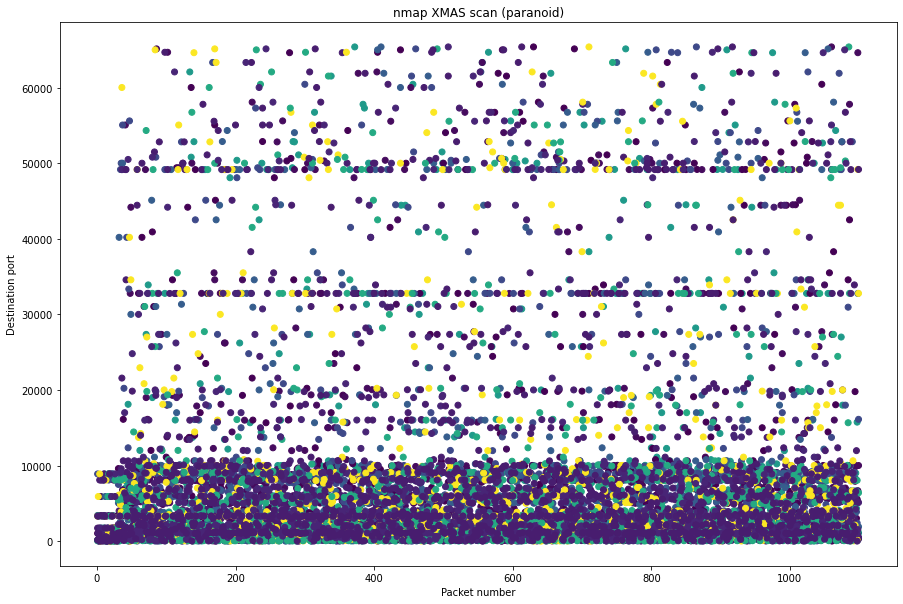

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

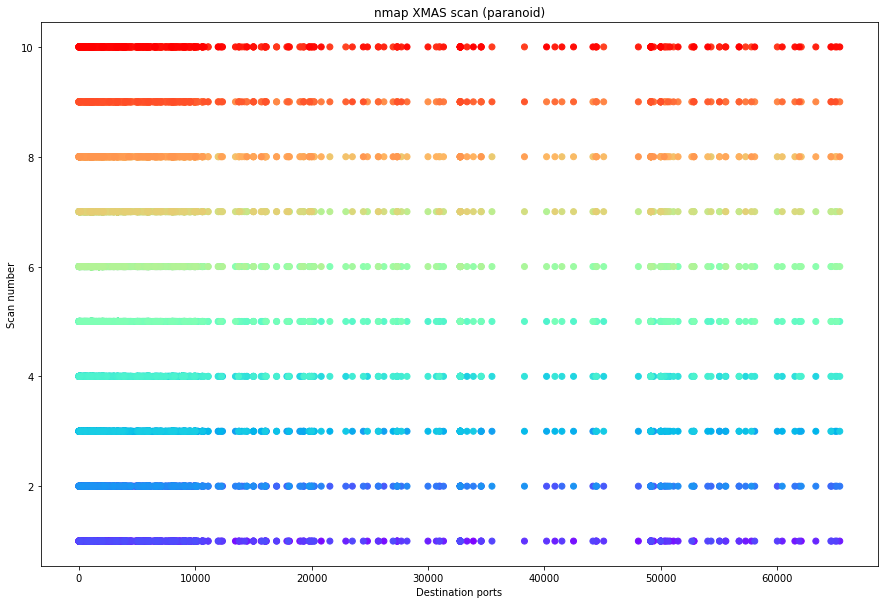

In [18]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


## Payloads

In [19]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

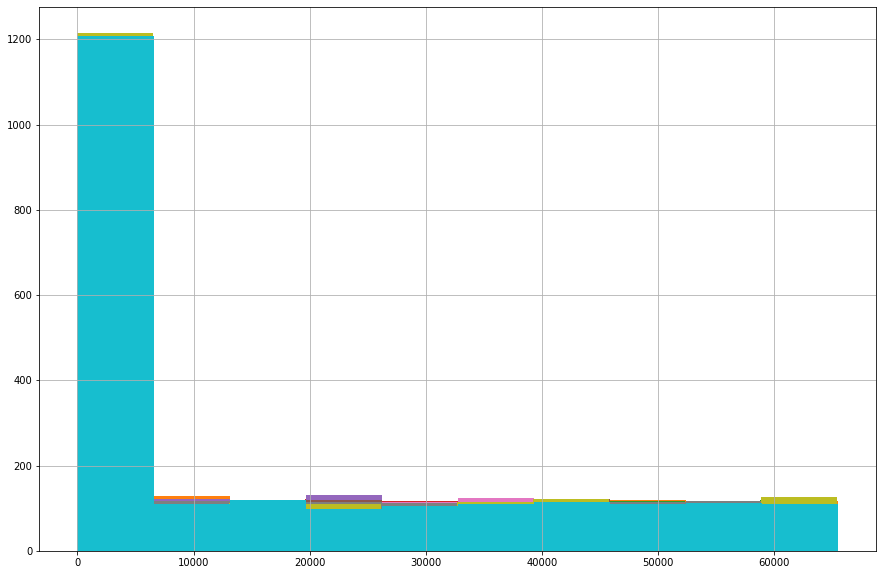

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

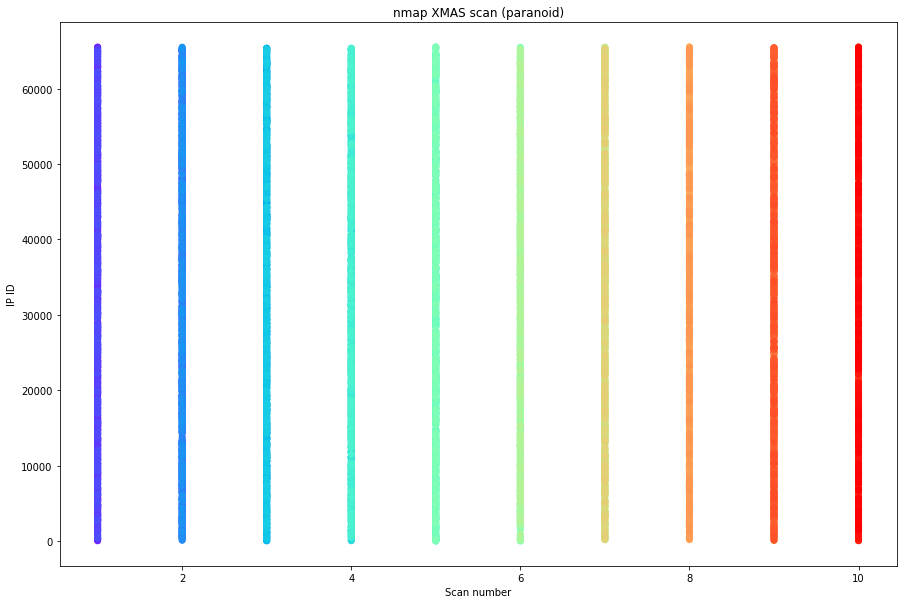

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


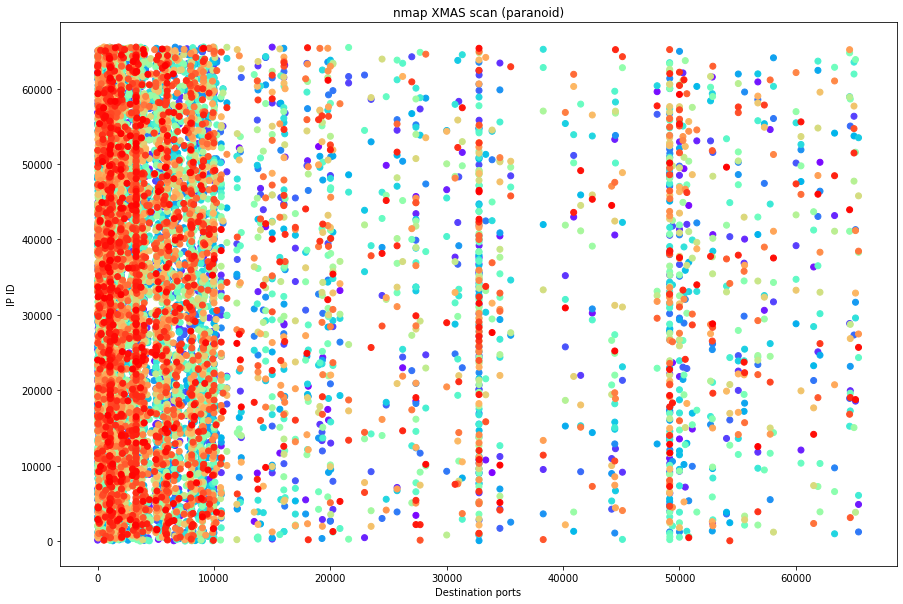

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

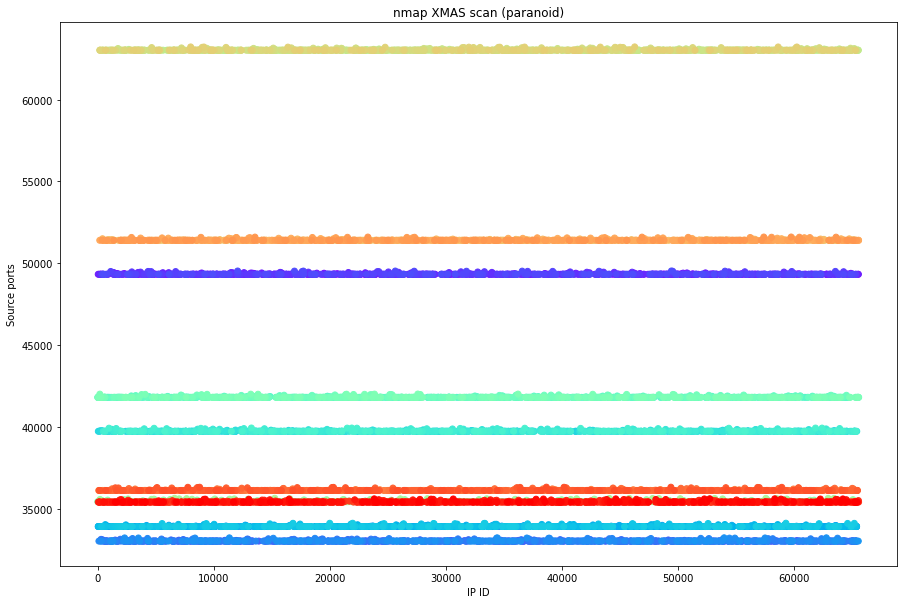

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492018700
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 491887630
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492805120
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
Sequence number: 492215305
S

Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2927641339
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2927772409
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 2927903487
Sequence number: 2919318138
Sequence number: 2919318138
Sequence number: 291

Sequence number: 554586603
Sequence number: 559239600
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 559108534
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 558977460
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 554586603
Sequence number: 560943498
Sequence number: 554586603
Sequence number: 554586603
S

Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2964324611
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2965242125
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2965111055
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 2961637684
Sequence number: 296

Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1553351181
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552957963
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1553089033
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 1552237086
Sequence number: 155

Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3055861842
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3056255068
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3056123998
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 3063136485
Sequence number: 306

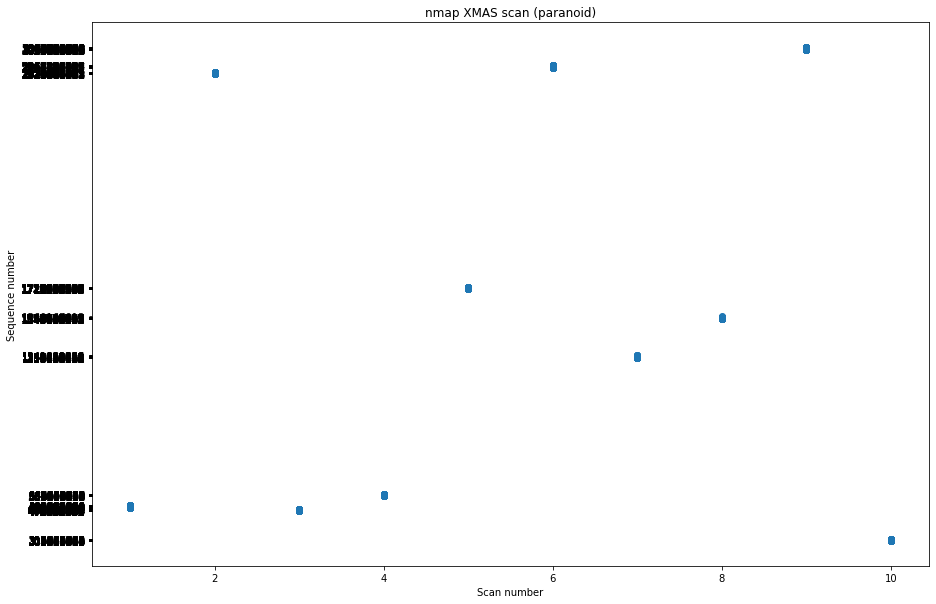

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


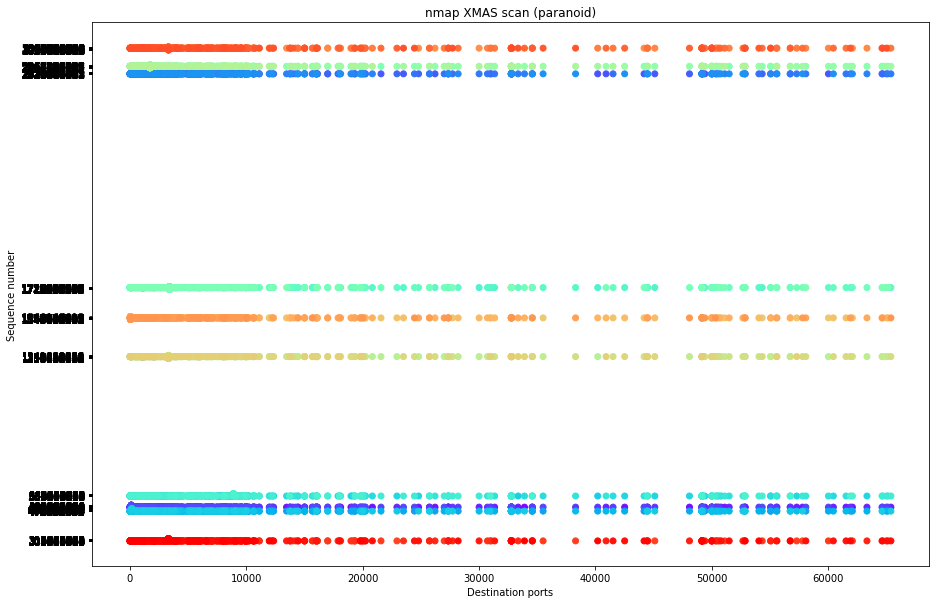

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

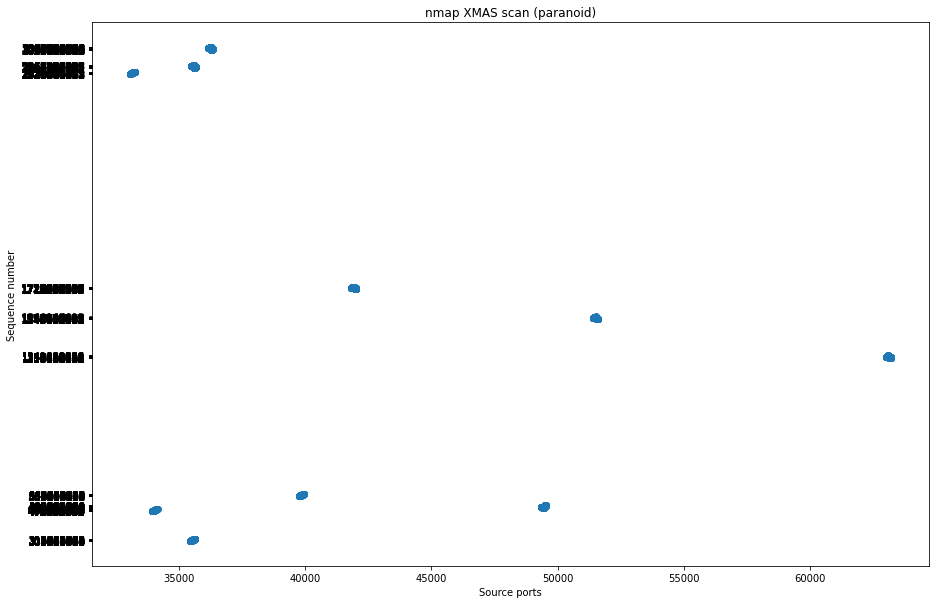

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

999

In [31]:
orders_port['sport'].value_counts()[:30]

35469    1001
49338    1000
33948    1000
35438    1000
33058    1000
63010    1000
41829    1000
39757    1000
36147    1000
51411    1000
63165       1
63163       1
63133       1
63135       1
63137       1
63179       1
63177       1
63175       1
63139       1
63141       1
63173       1
63143       1
63145       1
63147       1
63149       1
63151       1
63171       1
63153       1
63129       1
63155       1
Name: sport, dtype: int64

## Flags

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
-----
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flag

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU